## Supply Chain Shipment Pricing Data - Data Analysis and Modeling

Import Packages¶


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go 
import plotly.offline as py 
import os
%matplotlib inline 
py.init_notebook_mode(connected=True)
pd.options.display.max_columns = 9999


Import CSV

In [2]:
df = pd.read_csv('SCMS_Delivery_History_Dataset.csv').fillna(0)

In [3]:
len(df)

10324

Check DataType of CSV file


In [16]:
print(df.dtypes)

ID                                int64
Project Code                     object
PQ #                             object
PO / SO #                        object
ASN/DN #                         object
Country                          object
Managed By                       object
Fulfill Via                      object
Vendor INCO Term                 object
Shipment Mode                    object
PQ First Sent to Client Date     object
PO Sent to Vendor Date           object
Scheduled Delivery Date          object
Delivered to Client Date         object
Delivery Recorded Date           object
Product Group                    object
Sub Classification               object
Vendor                           object
Item Description                 object
Molecule/Test Type               object
Brand                            object
Dosage                           object
Dosage Form                      object
Unit of Measure (Per Pack)        int64
Line Item Quantity                int64


In [5]:
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,0,Test kit,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,0.0
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,0.0
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,0,Test kit,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,0.0
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,0.0
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,0.0


#### Top 10 Country
The countplot is used to represent the occurrence(counts) of the observation present in the categorical variable. It uses the concept of a bar chart for the visual depiction.

In [6]:
list_string = df['Country'].value_counts().nlargest(10).index.to_list()
list_string

['South Africa',
 'Nigeria',
 "Côte d'Ivoire",
 'Uganda',
 'Vietnam',
 'Zambia',
 'Haiti',
 'Mozambique',
 'Zimbabwe',
 'Tanzania']

Top 10 Countries Wise Count 

Country
South Africa     1406
Nigeria          1194
Côte d'Ivoire    1083
Uganda            779
Vietnam           688
Zambia            683
Haiti             655
Mozambique        631
Zimbabwe          538
Tanzania          519
Name: count, dtype: int64


Text(0.5, 0, 'Country Name')

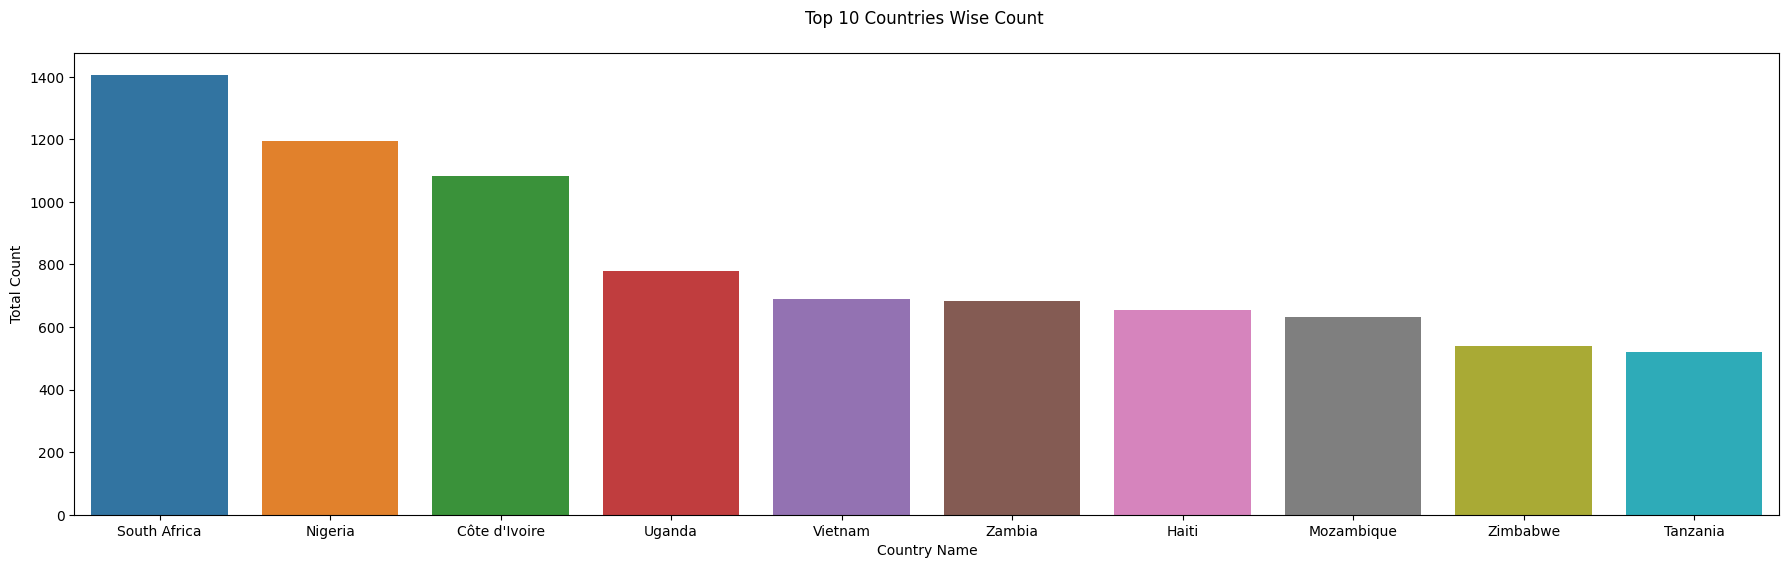

In [7]:
df = df.dropna()
top10country = df['Country'].value_counts().nlargest(10)
print("Top 10 Countries Wise Count \n")
print(top10country)
# sns.set_context("talk",font_scale=1)
plt.figure(figsize=(22,6))
sns.countplot(data = df, x='Country', order= df['Country'].value_counts().nlargest(10).index)
plt.title('Top 10 Countries Wise Count \n')
plt.ylabel('Total Count')
plt.xlabel('Country Name')


Shipment Mode percentage wise Pie Chart

In [42]:
shipping_mode = df['Shipment Mode'].value_counts()
label = (np.array(shipping_mode.index))
size = (np.array((shipping_mode/shipping_mode.sum())*100))
trace = go.Pie(labels=label, values=size)
data =[trace]
layout = go.Layout(title='Shipment Mode')
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Shipment Mode')

Unquie Manufacturing Site Names

In [11]:
unique_item = df['Manufacturing Site'].unique()
print("All Unique Manufacturing Site \n")
print(unique_item)

All Unique Manufacturing Site 

['Ranbaxy Fine Chemicals LTD' 'Aurobindo Unit III, India'
 'ABBVIE GmbH & Co.KG Wiesbaden' 'Ranbaxy, Paonta Shahib, India'
 'MSD South Granville Australia' "ABBVIE (Abbott) St. P'burg USA"
 'ABBVIE Ludwigshafen Germany' 'Trinity Biotech, Plc'
 'EY Laboratories, USA' 'Cipla, Goa, India' 'BMS Meymac, France'
 'Premier Med. Corp Ltd. India' 'Chembio Diagnostics Sys. Inc.'
 'Inverness Japan' 'Pacific Biotech, Thailand'
 'Standard Diagnostics, Korea' 'GSK Mississauga (Canada)'
 'Gilead(Nycomed) Oranienburg DE' 'Bio-Rad Laboratories'
 'Mylan (formerly Matrix) Nashik' 'Roche Basel' 'GSK Ware (UK)'
 'Novartis Pharma AG, Switzerland' 'BI, Ingelheim, Germany'
 'Not Applicable' 'Ipca Dadra/Nagar Haveli IN' 'MSD, Haarlem, NL'
 'Aspen-OSD, Port Elizabeth, SA' 'ABBVIE (Abbott) Logis. UK'
 'Gland Pharma Ltd Pally Factory' 'GSK Aranda'
 'Hetero Unit III Hyderabad IN' 'ABBVIE (Abbott) France'
 'Strides, Bangalore, India.' 'ABBSP' 'Cipla, Patalganga, India'
 'GSK Cape Tow

Shipment Mode, Min and Mean value for Air


<Axes: ylabel='count'>

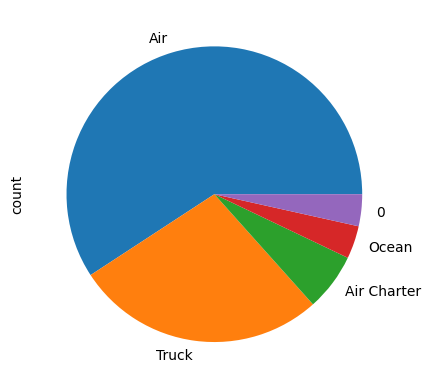

In [15]:
df['Shipment Mode'].value_counts().plot(kind='pie')

In [81]:
list_col = ['Scheduled Delivery Date','Delivered to Client Date','Delivery Recorded Date','Vendor','Pack Price','Unit Price','Unit of Measure (Per Pack)','Shipment Mode','Product Group','Manufacturing Site','Freight Cost (USD)']

In [82]:
df[list_col]

,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Vendor,Pack Price,Unit Price,Unit of Measure (Per Pack),Shipment Mode,Product Group,Manufacturing Site,Freight Cost (USD)
0,2-Jun-06,2-Jun-06,2-Jun-06,RANBAXY Fine Chemicals LTD.,29.00,0.97,30,Air,HRDT,Ranbaxy Fine Chemicals LTD,780.34
1,14-Nov-06,14-Nov-06,14-Nov-06,Aurobindo Pharma Limited,6.20,0.03,240,Air,ARV,"Aurobindo Unit III, India",4521.5
2,27-Aug-06,27-Aug-06,27-Aug-06,Abbott GmbH & Co. KG,80.00,0.80,100,Air,HRDT,ABBVIE GmbH & Co.KG Wiesbaden,1653.78
3,1-Sep-06,1-Sep-06,1-Sep-06,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,3.99,0.07,60,Air,ARV,"Ranbaxy, Paonta Shahib, India",16007.06
4,11-Aug-06,11-Aug-06,11-Aug-06,Aurobindo Pharma Limited,3.20,0.05,60,Air,ARV,"Aurobindo Unit III, India",45450.08
...,...,...,...,...,...,...,...,...,...,...,...
10319,31-Jul-15,15-Jul-15,20-Jul-15,SCMS from RDC,3.60,0.06,60,Truck,ARV,"Mylan, H-12 & H-13, India",See DN-4307 (ID#:83920)
10320,31-Jul-15,6-Aug-15,7-Aug-15,SCMS from RDC,6.52,0.11,60,Truck,ARV,Hetero Unit III Hyderabad IN,See DN-4313 (ID#:83921)
10321,31-Aug-15,25-Aug-15,3-Sep-15,SCMS from RDC,9.99,0.33,30,Truck,ARV,Cipla Ltd A-42 MIDC Mahar. IN,Freight Included in Commodity Cost
10322,9-Sep-15,4-Aug-15,11-Aug-15,SCMS from RDC,6.52,0.11,60,Truck,ARV,Mylan (formerly Matrix) Nashik,Freight Included in Commodity Cost


In [83]:
df[list_col].to_csv('supply_chain_Dataset1.csv',index=False)

Vendor
SCMS from RDC               5404
Orgenics, Ltd                754
S. BUYS WHOLESALER           715
Aurobindo Pharma Limited     668
Trinity Biotech, Plc         356
Name: count, dtype: int64


Text(0.5, 1.0, 'Top 5 Vendor')

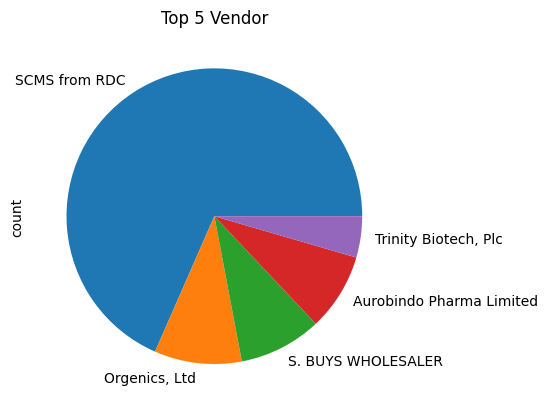

In [32]:
top_vendor = df['Vendor'].value_counts().nlargest(5)
print(top_vendor)
top_vendor = df['Vendor'].value_counts().nlargest(5).plot(kind='pie')
plt.title("Top 5 Vendor")

In [43]:
top10site = df['Manufacturing Site'].value_counts().nlargest(10)
labels = (np.array(top10site.index))
size = (np.array(top10site.values))
trace = go.Pie(labels=labels, values=size)
layout = go.Layout(title="Top 10 Manufacturing Site")
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Top 10 Manufacturing Site')

In [67]:
grouped_data = df[['Shipment Mode','Unit of Measure (Per Pack)']].groupby('Shipment Mode').sum().sort_values(by='Unit of Measure (Per Pack)',ascending=False)

In [59]:
color_palette = sns.color_palette('coolwarm',len(grouped_data))

In [78]:
values = grouped_data.values.reshape(-1)

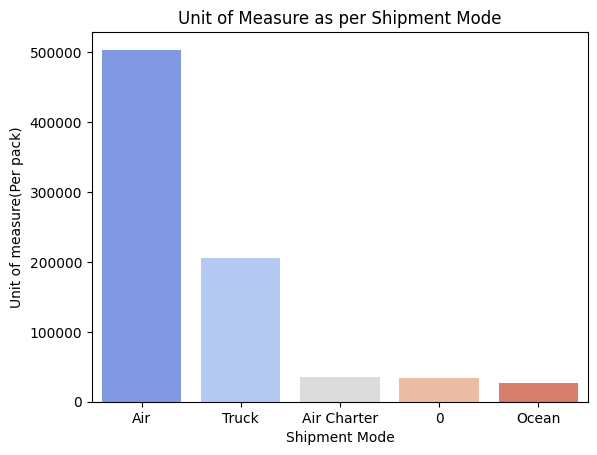

In [80]:
sns.barplot(x=grouped_data.index, y= values,palette=color_palette)
plt.ylabel('Unit of measure(Per pack)')
plt.title('Unit of Measure as per Shipment Mode')
plt.show()

<Axes: xlabel='Shipment Mode'>

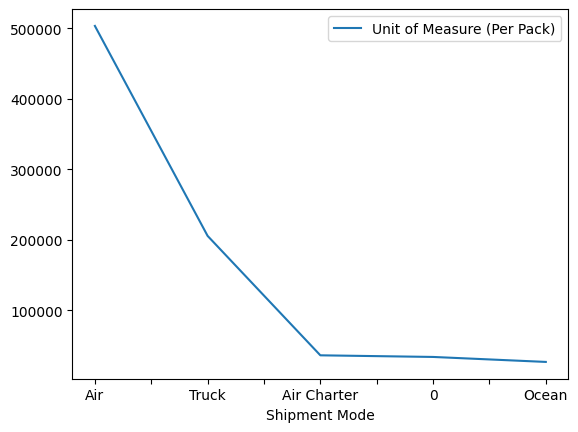

In [85]:
grouped_data.plot(legend=True)

### Conclusion
Top Country for Pack Price : Nigeria - 25,620.72
<br>
Top Shipping Mode : Air
<br>
The Max Air Shipment Mode is : 1000
<br>
The Min Air Shipment is : 1
<br>
The Mean Air Shipment is : 82.35
<br>
Top Manufacturing Site : Aurobindo Unit III, India - 3172
<br>
Top Air Manufacturing Site : Aurobindo Unit III, India - 1694 